In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support,precision_score,accuracy_score,f1_score,confusion_matrix,plot_precision_recall_curve,recall_score

In [2]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
os.chdir('/content/gdrive/My Drive/placement/IIBM')
data = pd.read_csv('tumor_data.csv')
label = pd.read_csv('tumor_labels.csv')

In [4]:
data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,1.334282,2.015391,0.591871,0.0,0.0,0.0,0.0,0.591871,5.619994,1.334282,0.000000,9.796088,0.0,0.000000,1.598651,7.215116,10.839070,6.620204,9.513538,0.0,4.063658,7.764805,4.747656,13.714396,10.034496,0.000000,0.0,9.833458,...,9.370304,10.362393,5.589928,8.141964,0.000000,2.736583,7.037152,7.123480,10.967399,5.902800,3.719370,7.203554,6.042557,2.602077,7.425526,7.846957,2.824951,6.239396,0.000000,8.469593,0.0,6.535978,6.968701,7.128881,7.175175,9.249369,7.025970,8.045563,7.475709,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,0.000000,0.587845,2.466601,1.004394,0.0,0.0,0.0,0.0,0.000000,11.055208,3.562621,0.000000,10.070470,0.0,0.000000,0.000000,9.949812,8.522476,1.174790,4.926991,0.0,0.000000,5.819832,1.327170,13.286240,6.663316,0.587845,0.0,9.533302,...,8.882967,9.898199,7.069401,7.186134,0.000000,3.134993,6.648930,6.715701,9.536238,1.004394,5.555482,8.029260,6.366219,0.811142,7.991732,7.161001,0.000000,4.708877,0.811142,8.451689,0.0,7.242336,8.046284,6.047558,8.572901,7.549030,7.019935,9.458940,9.190867,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,0.000000,0.452595,1.981122,1.074163,0.0,0.0,0.0,0.0,1.683023,8.210248,4.195285,3.660427,8.970920,0.0,0.000000,0.796598,6.096650,9.861616,7.680507,3.119439,0.0,0.452595,7.899526,0.000000,10.731098,6.967883,0.452595,0.0,9.646323,...,10.355637,10.423274,5.170201,6.194260,0.000000,3.677147,6.271990,7.089816,9.675220,0.000000,4.224017,8.020402,6.967883,5.014445,8.400038,7.527555,0.000000,4.997902,0.796598,7.761132,0.0,6.820460,8.048983,6.661493,7.716332,6.745802,7.524667,8.602350,9.036654,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,0.000000,0.434882,2.874246,0.000000,0.0,0.0,0.0,0.0,1.267356,8.306317,3.573556,0.000000,8.524616,0.0,0.000000,0.000000,3.913761,9.511573,6.469165,7.029895,0.0,1.267356,6.800641,7.742714,12.659474,8.299890,0.768587,0.0,9.670731,...,10.074382,9.918261,7.117924,7.196145,0.434882,3.609755,8.896696,7.577096,10.731446,5.075383,2.175652,7.675435,6.840816,6.233192,8.899886,8.319085,1.791814,5.661134,1.464093,8.625727,0.0,7.420095,7.784746,7.613915,8.963286,7.744699,7.924997,8.981473,8.665592,9.194823,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,0.000000,1.275841,2.141204,0.000000,0.0,0.0,0.0,0.0,0.889707,10.149150,2.967630,0.000000,8.047238,0.0,1.435949,0.000000,1.942120,8.821535,5.861429,7.755709,0.0,0.649386,5.570241,2.612801,13.556734,8.004754,0.000000,0.0,9.587569,...,10.129154,10.062303,6.911620,7.855149,0.360982,3.655810,7.255520,7.292607,10.779793,3.954001,6.991148,8.153248,7.508444,4.586531,9.152227,8.227717,0.360982,6.227104,0.649386,8.151879,0.0,6.558289,8.673708,6.505099,8.948989,7.010366,7.364056,8.950646,8.233366,9

In [5]:
data.shape

(801, 20532)

In [6]:
data.iloc[:,[3,6]]

,gene_2,gene_5
0,3.265527,0.0
1,1.588421,0.0
2,4.327199,0.0
3,4.507649,0.0
4,2.821547,0.0
...,...,...
796,2.718197,0.0
797,4.453807,0.0
798,3.707492,0.0
799,2.787976,0.0


In [7]:
data.isnull().count()

Unnamed: 0    801
gene_0        801
gene_1        801
gene_2        801
gene_3        801
             ... 
gene_20526    801
gene_20527    801
gene_20528    801
gene_20529    801
gene_20530    801
Length: 20532, dtype: int64

In [8]:
data.iloc[:,1:11].columns

Index(['gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5', 'gene_6',
       'gene_7', 'gene_8', 'gene_9'],
      dtype='object')

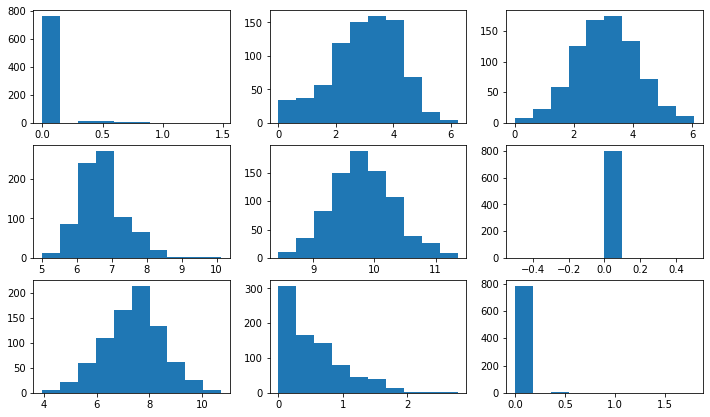

In [9]:
# distribution of variables
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
for i,j in zip(range(9),data.iloc[:,1:11].columns):
  plt.subplot(5,3,i+1)
  plt.hist(data[j])

In [10]:
label.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [11]:
label.shape

(801, 2)

In [12]:
label.Class.values

array(['PRAD', 'LUAD', 'PRAD', 'PRAD', 'BRCA', 'PRAD', 'KIRC', 'PRAD',
       'BRCA', 'PRAD', 'BRCA', 'KIRC', 'PRAD', 'BRCA', 'BRCA', 'BRCA',
       'LUAD', 'KIRC', 'KIRC', 'PRAD', 'BRCA', 'KIRC', 'LUAD', 'BRCA',
       'KIRC', 'LUAD', 'COAD', 'BRCA', 'BRCA', 'BRCA', 'BRCA', 'BRCA',
       'KIRC', 'BRCA', 'PRAD', 'BRCA', 'KIRC', 'LUAD', 'BRCA', 'BRCA',
       'KIRC', 'PRAD', 'PRAD', 'KIRC', 'KIRC', 'BRCA', 'PRAD', 'COAD',
       'BRCA', 'LUAD', 'BRCA', 'LUAD', 'BRCA', 'PRAD', 'COAD', 'BRCA',
       'BRCA', 'COAD', 'KIRC', 'BRCA', 'LUAD', 'KIRC', 'BRCA', 'LUAD',
       'PRAD', 'COAD', 'BRCA', 'PRAD', 'KIRC', 'BRCA', 'KIRC', 'BRCA',
       'BRCA', 'LUAD', 'BRCA', 'LUAD', 'BRCA', 'KIRC', 'PRAD', 'COAD',
       'BRCA', 'PRAD', 'BRCA', 'BRCA', 'PRAD', 'PRAD', 'BRCA', 'BRCA',
       'KIRC', 'BRCA', 'PRAD', 'PRAD', 'BRCA', 'BRCA', 'BRCA', 'PRAD',
       'COAD', 'BRCA', 'PRAD', 'BRCA', 'BRCA', 'KIRC', 'BRCA', 'KIRC',
       'LUAD', 'KIRC', 'LUAD', 'COAD', 'LUAD', 'LUAD', 'PRAD', 'BRCA',
      

In [13]:
label.Class.unique()

array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

In [14]:
lb_encode = preprocessing.LabelEncoder()
target = lb_encode.fit_transform(label.Class.values)
target

array([4, 3, 4, 4, 0, 4, 2, 4, 0, 4, 0, 2, 4, 0, 0, 0, 3, 2, 2, 4, 0, 2,
       3, 0, 2, 3, 1, 0, 0, 0, 0, 0, 2, 0, 4, 0, 2, 3, 0, 0, 2, 4, 4, 2,
       2, 0, 4, 1, 0, 3, 0, 3, 0, 4, 1, 0, 0, 1, 2, 0, 3, 2, 0, 3, 4, 1,
       0, 4, 2, 0, 2, 0, 0, 3, 0, 3, 0, 2, 4, 1, 0, 4, 0, 0, 4, 4, 0, 0,
       2, 0, 4, 4, 0, 0, 0, 4, 1, 0, 4, 0, 0, 2, 0, 2, 3, 2, 3, 1, 3, 3,
       4, 0, 3, 4, 0, 2, 2, 2, 0, 0, 3, 2, 3, 0, 4, 4, 4, 0, 2, 3, 1, 0,
       1, 0, 0, 2, 3, 0, 2, 1, 0, 4, 0, 2, 3, 1, 4, 0, 3, 3, 3, 3, 0, 0,
       3, 0, 0, 4, 4, 3, 4, 3, 2, 0, 4, 3, 1, 2, 3, 0, 2, 3, 0, 3, 0, 0,
       0, 4, 0, 2, 1, 2, 0, 4, 4, 4, 3, 3, 0, 3, 3, 2, 3, 4, 3, 0, 0, 0,
       3, 3, 0, 2, 2, 2, 2, 4, 0, 4, 0, 3, 3, 0, 4, 0, 4, 0, 0, 0, 3, 0,
       2, 3, 2, 2, 3, 0, 2, 4, 0, 3, 3, 4, 1, 0, 2, 4, 2, 1, 0, 2, 2, 3,
       4, 4, 3, 3, 2, 0, 0, 1, 0, 4, 1, 0, 4, 2, 4, 4, 4, 0, 1, 1, 3, 1,
       1, 4, 3, 0, 0, 2, 2, 0, 1, 4, 2, 4, 0, 0, 2, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 3, 4, 0,

In [15]:
kf = KFold(n_splits=5,shuffle=True)
#n_splits : int, default=5 Number of folds. Must be at least 2.
#shuffle : boolean, optional Whether to shuffle the data before splitting into batches.

In [16]:
features = data.values[:,1:]
features

array([[0.0, 2.01720929003, 3.2655269116500003, ..., 8.92132623446,
        5.28675919351, 0.0],
       [0.0, 0.592732094867, 1.5884208204899999, ..., 9.39785429023,
        2.09416849472, 0.0],
       [0.0, 3.5117589779, 4.32719871937, ..., 10.0904697402,
        1.6830226650600002, 0.0],
       ...,
       [0.0, 3.24958186728, 3.7074916606599997, ..., 9.4667107202,
        4.6774575018, 0.58669269686],
       [0.0, 2.5903385331799997, 2.7879756715, ..., 10.4005806223,
        5.71875067661, 0.0],
       [0.0, 2.3252424833900003, 3.8059321356, ..., 9.84479362571,
        4.55071600756, 0.0]], dtype=object)

check on train data set

Accuracy on training set :1.0
check on Test data set

Precision Score
[0.98387097 0.93333333 1.         0.96666667 1.        ]

Recall Score
[0.98387097 1.         0.96969697 0.96666667 1.        ]

 f1 score
[0.98387097 0.96551724 0.98461538 0.96666667 1.        ]
check on train data set

Accuracy on training set :1.0
check on Test data set

Precision Score
[0.984375   0.94736842 1.         1.         1.        ]

Recall Score
[1.         1.         0.96551724 0.95652174 1.        ]

 f1 score
[0.99212598 0.97297297 0.98245614 0.97777778 1.        ]
check on train data set

Accuracy on training set :0.9984399375975039
check on Test data set

Precision Score
[0.95 1.   1.   1.   1.  ]

Recall Score
[1.         0.94117647 1.         0.93939394 1.        ]

 f1 score
[0.97435897 0.96969697 1.         0.96875    1.        ]
check on train data set

Accuracy on training set :0.9953198127925117
check on Test data set

Precision Score
[1.         0.94117647 1.       

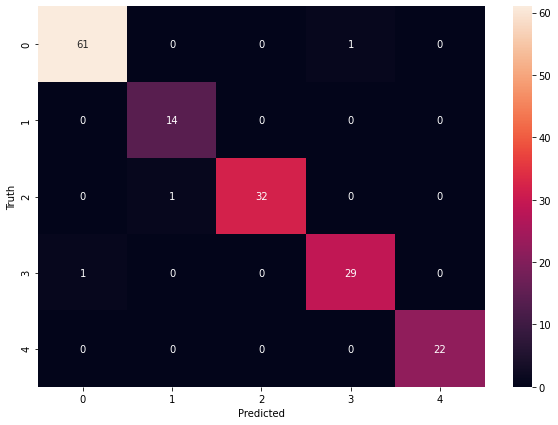

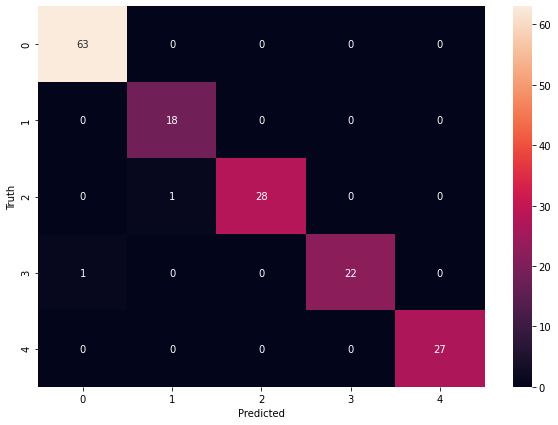

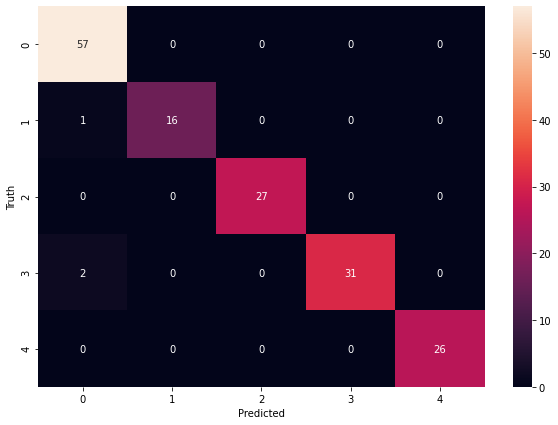

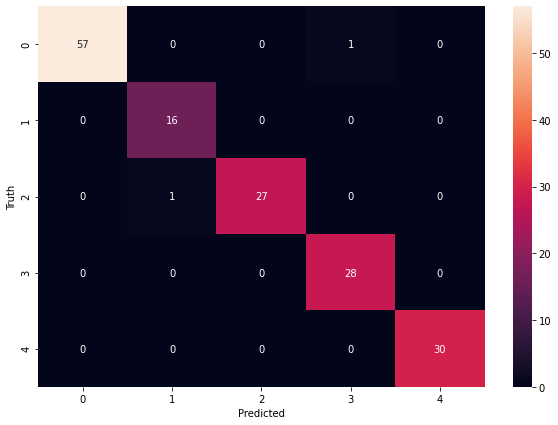

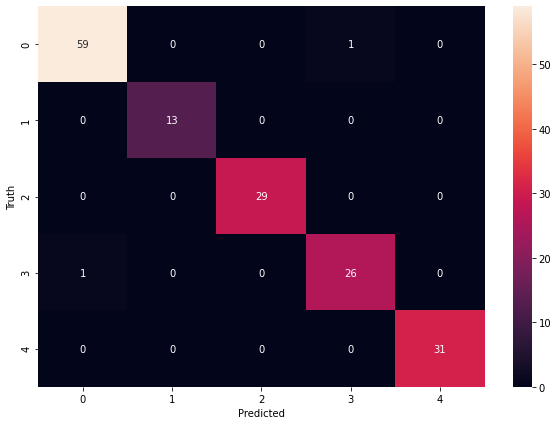

In [17]:
for train_idx,test_idx in kf.split(features):
  #splitting data into test and train
  x_train,x_test = features[train_idx],features[test_idx]
  y_train,y_test = target[train_idx],target[test_idx]

  #features selection by chi2(chi square) 
  ch2 = SelectKBest(chi2,k=20)
  ch2_train = ch2.fit_transform(x_train,y_train)
  ch2_test = ch2.transform(x_test)

  #Random Forest algorithm is used
  tree_mdl = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
  tree_mdl.fit(ch2_train, y_train)

  #predicting for test data
  y_pred = tree_mdl.predict(ch2_test)

  #tree_mdl performance summary
  print('check on train data set')
  print('\nAccuracy on training set :' +str(tree_mdl.score(ch2_train,y_train)))
  print('check on Test data set')

  # precision score, recall score,f1 score
  print('\nPrecision Score')
  print(precision_score(y_test,y_pred,average=None))
  print('\nRecall Score')
  print(recall_score(y_test,y_pred,average=None))
  print('\n f1 score')
  print(f1_score(y_test,y_pred,average=None))

  cm=confusion_matrix(y_test,y_pred)
  plt.figure(figsize=(10,7))
  sns.heatmap(cm, annot=True)
  plt.xlabel('Predicted')
  plt.ylabel('Truth')